In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from glob import glob
import cv2

# import model 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
import os


In [2]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end( self , model , logs={}):
        if logs.get("accuracy")>0.95:
            print("\n\nGot 97 % accuracy")
            self.model.stop_training = True

In [3]:
train_dir = 'C:/Users/Harsha/Downloads/Tensor_Flow/fruits-360/Training/'
file = os.listdir(train_dir)
print(file)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [4]:
fruits = []
fruits_image = []
for i in os.listdir(train_dir):
    for image_filename in os.listdir(train_dir + "//" +i):
        fruits.append(i) # name of the fruit 
        fruits_image.append(i + '/' + image_filename) # image of the fruit
print(len(train_dir))

58


In [5]:
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image
train_fruits

,Fruits,Fruits Image
0,Apple Braeburn,Apple Braeburn/0_100.jpg
1,Apple Braeburn,Apple Braeburn/100_100.jpg
2,Apple Braeburn,Apple Braeburn/101_100.jpg
3,Apple Braeburn,Apple Braeburn/102_100.jpg
4,Apple Braeburn,Apple Braeburn/103_100.jpg
...,...,...
67687,Watermelon,Watermelon/r_6_100.jpg
67688,Watermelon,Watermelon/r_7_100.jpg
67689,Watermelon,Watermelon/r_81_100.jpg
67690,Watermelon,Watermelon/r_8_100.jpg


In [6]:
from collections import Counter
newData = Counter(train_fruits["Fruits"])
most_fruits = newData.most_common(15)

print("The 15 most frequently found fruits in the data set and their number")
most_fruits

The 15 most frequently found fruits in the data set and their number


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry 2', 738),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Tomato 1', 738),
 ('Tomato 3', 738),
 ('Walnut', 735),
 ('Pear Stone', 711),
 ('Cauliflower', 702),
 ('Fig', 702),
 ('Pear Forelle', 702),
 ('Pepper Orange', 702)]

In [7]:
x,y = zip(*most_fruits)
x,y = list(x),list(y)
x

['Grape Blue',
 'Plum 3',
 'Cherry 2',
 'Cherry Rainier',
 'Melon Piel de Sapo',
 'Peach 2',
 'Strawberry Wedge',
 'Tomato 1',
 'Tomato 3',
 'Walnut',
 'Pear Stone',
 'Cauliflower',
 'Fig',
 'Pear Forelle',
 'Pepper Orange']

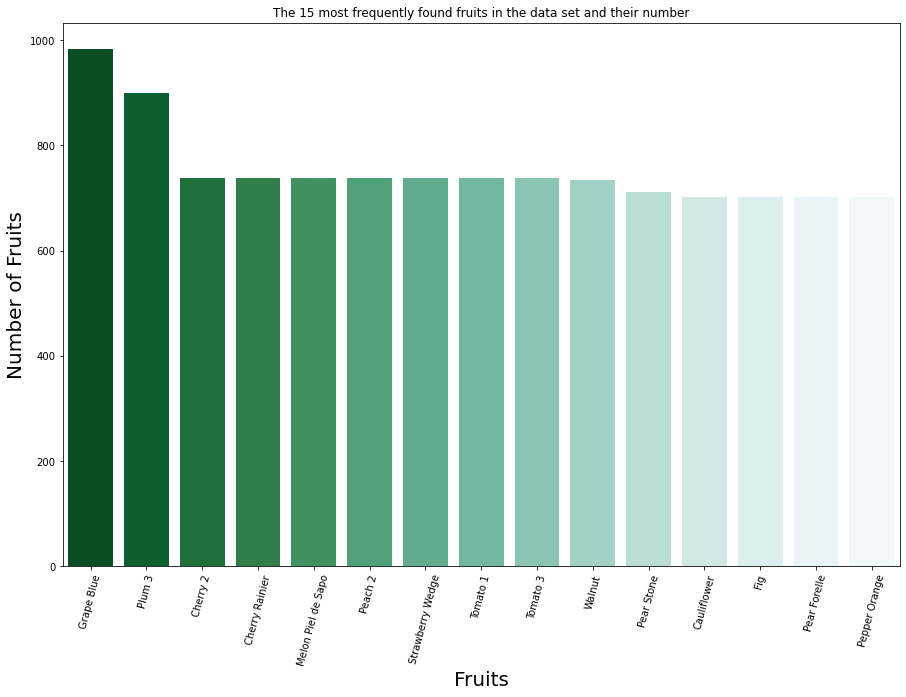

In [8]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('The 15 most frequently found fruits in the data set and their number') 
plt.show()

In [9]:
fruitCountUnique = glob(train_dir + '/*' )
num = len(fruitCountUnique)
print("How many different fruits are there  -->  ",num)

How many different fruits are there  -->   131


15
Grape Blue/100_100.jpg
Plum 3/100_100.jpg
Cherry 2/106_100.jpg
Cherry Rainier/10_100.jpg
Melon Piel de Sapo/101_100.jpg
Peach 2/102_100.jpg
Strawberry Wedge/11_100.jpg
Tomato 1/100_100.jpg
Tomato 3/101_100.jpg
Walnut/101_100.jpg
Pear Stone/101_100.jpg
Cauliflower/100_100.jpg
Fig/100_100.jpg
Pear Forelle/100_100.jpg
Pepper Orange/10_100.jpg


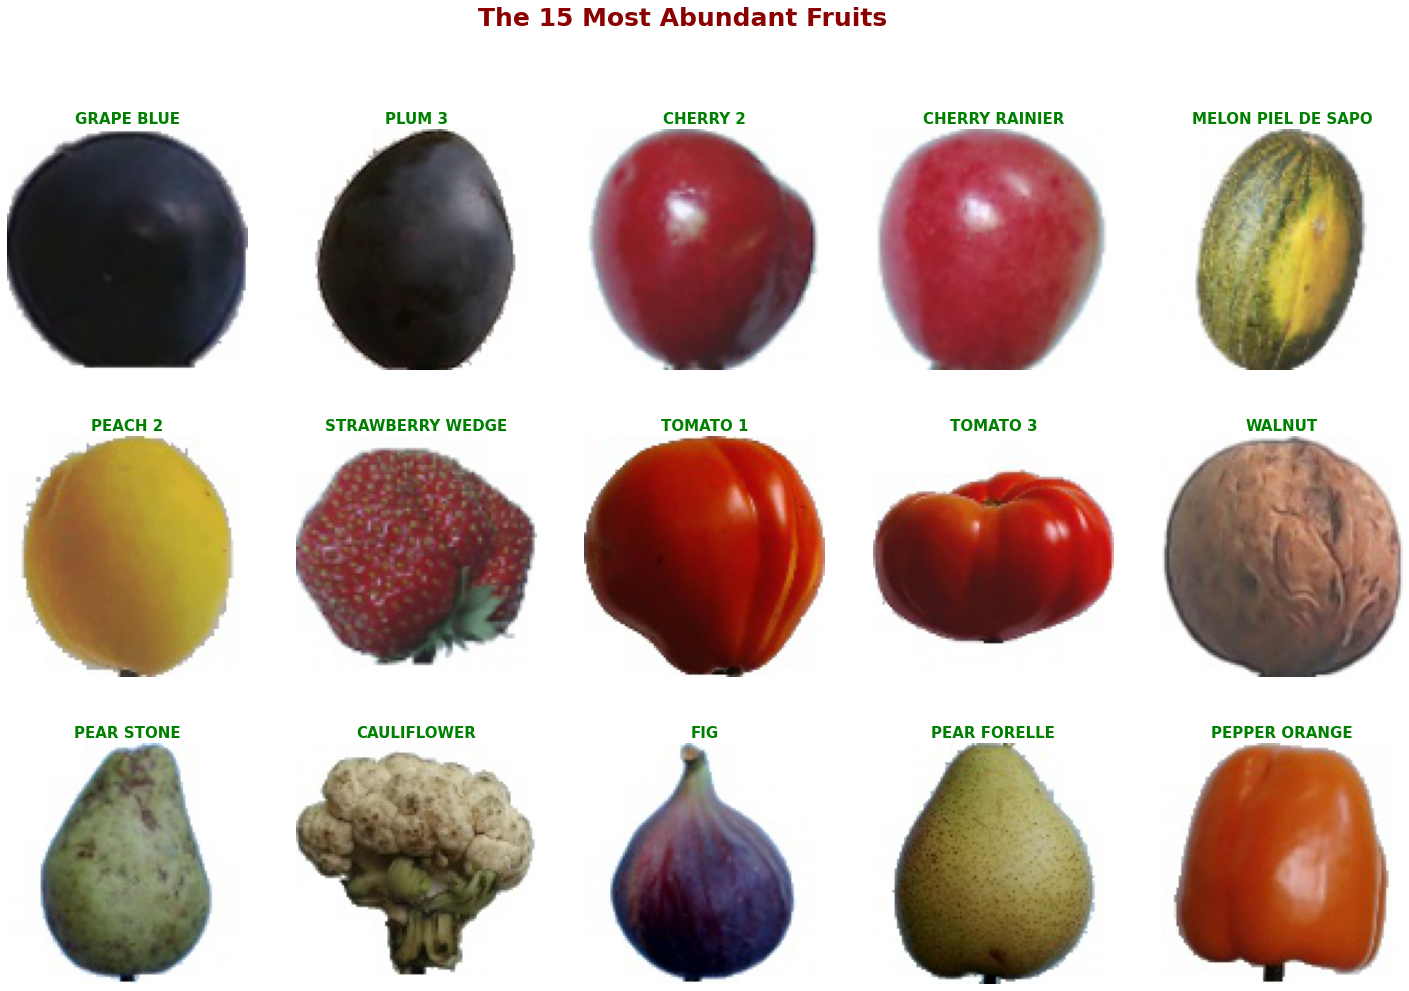

In [10]:
plt.figure(figsize=(25,16))
how_many_fruits = len(x)
print(how_many_fruits)
for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]
    print(fruits)
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Abundant Fruits", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

In [11]:
train_dir = os.path.join(r'C:\Users\Harsha\Downloads\Tensor_Flow\fruits-360\Training')
test_dir = os.path.join(r'C:\Users\Harsha\Downloads\Tensor_Flow\fruits-360\Test')
callbacks  = mycallback()

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(131,activation = "softmax")
])

In [22]:
from tensorflow.keras.optimizers import RMSprop 

model.compile(loss="categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ['accuracy'])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

training_gen = training_datagen.flow_from_directory(
    r"C:\Users\Harsha\Downloads\Tensor_Flow\fruits-360\Training",
    target_size = (150,150),
    batch_size = 32 ,
    class_mode = "categorical"
    )
validation_gen = validation_datagen.flow_from_directory(
    r"C:\Users\Harsha\Downloads\Tensor_Flow\fruits-360\Test",
    target_size = (150,150),
    batch_size = 32 ,
    class_mode = "categorical"
    )

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [24]:
for data_batch, labels_batch in training_gen:
    print("data_batch shape --> ",data_batch.shape)
    print("labels_batch shape --> ",labels_batch.shape)
    break

data_batch shape -->  (32, 150, 150, 3)
labels_batch shape -->  (32, 131)


In [25]:
training_epoch = training_gen.n//training_gen.batch_size
validation_epoch = validation_gen.n//validation_gen.batch_size
training_epoch

2115

In [26]:
history = model.fit(
    training_gen,
    steps_per_epoch=67692//1024 , 
    epochs = 100 ,
    validation_data = validation_gen ,  
    validation_steps=22688//1024,
    verbose = 1 ,
    callbacks=[callbacks])

Epoch 1/100
66/66 [==============================] - 23s 344ms/step - loss: 4.8135 - accuracy: 0.0270 - val_loss: 3.9838 - val_accuracy: 0.0611
Epoch 2/100
66/66 [==============================] - 24s 357ms/step - loss: 3.6659 - accuracy: 0.1026 - val_loss: 2.9713 - val_accuracy: 0.1861
Epoch 3/100
66/66 [==============================] - 24s 358ms/step - loss: 2.9014 - accuracy: 0.2060 - val_loss: 2.4929 - val_accuracy: 0.3054
Epoch 4/100
66/66 [==============================] - 24s 357ms/step - loss: 2.3999 - accuracy: 0.2972 - val_loss: 1.9363 - val_accuracy: 0.4062
Epoch 5/100
66/66 [==============================] - 24s 358ms/step - loss: 2.0577 - accuracy: 0.3901 - val_loss: 1.4492 - val_accuracy: 0.5455
Epoch 6/100
66/66 [==============================] - 24s 356ms/step - loss: 1.7988 - accuracy: 0.4186 - val_loss: 1.2111 - val_accuracy: 0.6122
Epoch 7/100
66/66 [==============================] - 24s 361ms/step - loss: 1.6572 - accuracy: 0.4925 - val_loss: 2.1079 - val_accuracy:

66/66 [==============================] - 26s 386ms/step - loss: 0.2215 - accuracy: 0.9289 - val_loss: 0.2469 - val_accuracy: 0.9474
Epoch 58/100
66/66 [==============================] - 26s 390ms/step - loss: 0.2557 - accuracy: 0.9137 - val_loss: 0.1341 - val_accuracy: 0.9574
Epoch 59/100
66/66 [==============================] - 26s 389ms/step - loss: 0.2565 - accuracy: 0.9228 - val_loss: 0.2430 - val_accuracy: 0.9304
Epoch 60/100
66/66 [==============================] - 27s 402ms/step - loss: 0.2366 - accuracy: 0.9207 - val_loss: 0.4156 - val_accuracy: 0.8920
Epoch 61/100
66/66 [==============================] - 27s 405ms/step - loss: 0.2478 - accuracy: 0.9275 - val_loss: 0.4264 - val_accuracy: 0.9077
Epoch 62/100
66/66 [==============================] - 26s 390ms/step - loss: 0.2972 - accuracy: 0.9265 - val_loss: 0.3237 - val_accuracy: 0.9134
Epoch 63/100
66/66 [==============================] - 28s 428ms/step - loss: 0.2232 - accuracy: 0.9340 - val_loss: 0.1990 - val_accuracy: 0.943

<Figure size 432x288 with 0 Axes>

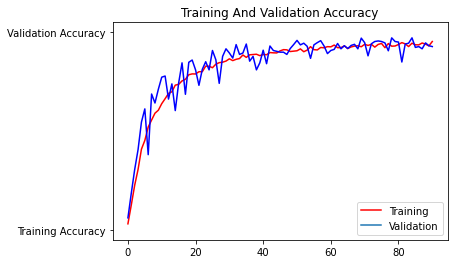

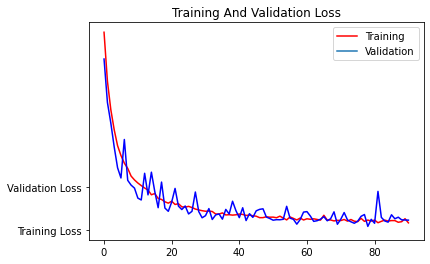

<Figure size 432x288 with 0 Axes>

In [27]:
acc = history.history["accuracy"]
loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs , acc , "r" ,"Training Accuracy")
plt.plot(epochs , val_acc , "b", "Validation Accuracy")
plt.title("Training And Validation Accuracy")
plt.legend(["Training " , "Validation"])
plt.figure()

plt.plot(epochs , loss , "r" ,"Training Loss")
plt.plot(epochs , val_loss , "b", "Validation Loss")
plt.title("Training And Validation Loss")
plt.legend(["Training " , "Validation"])
plt.figure()

In [28]:
import numpy as np
#from google.colab import files
from keras.preprocessing import image

#uploaded = files.upload()

#for fn in uploaded.keys():
 
  # predicting images
fn = r"C:\Users\Harsha\Downloads\Tensor_Flow\fruits-360\test-multiple_fruits\apple.jpg"
path = fn
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(fn)
print(classes)

C:\Users\Harsha\Downloads\Tensor_Flow\fruits-360\test-multiple_fruits\apple.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


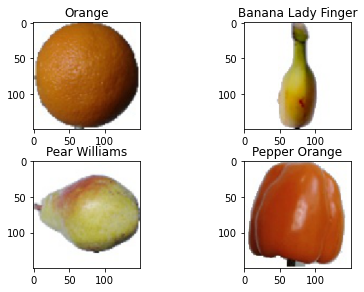

In [46]:
x_test_batch, y_test_batch = next(validation_gen)

labels = os.listdir("C:/Users/Harsha/Downloads/Tensor_Flow/fruits-360/test/")

def predict(img):
    y_pred = model.predict(np.array([img]))
    y_class = y_pred.argmax(axis=-1)
    return labels[y_class[0]]


f, axarr = plt.subplots(2,2)

f.tight_layout()

for col in range(0,2):
    for row in range(0,2):
        axarr[col, row].imshow(x_test_batch[col*3+row])
        axarr[col, row].title.set_text(predict(x_test_batch[col*3+row]))

plt.show()